## Support Vector Machine

<img src="Svm_photo.jpg" width='80%'>

```for 2-d data = line```
```for 3-d data = plane```

<img src="SvmDiagram.png" width="50%">

#### for more details visit these sites
[Chatgpt link for svm](https://chat.openai.com/share/68660d4a-a250-800b-80af-1e4e4c90ac08)

[Analytic vidhya](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

#### let's implement it 

In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay

In [29]:
df=pd.read_csv("income_evaluation.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [30]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [31]:
df.duplicated().sum()

np.int64(24)

In [32]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [33]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [34]:
df.dropna(inplace=True)

In [35]:
np.unique(df[' income'])

array([' <=50K', ' >50K'], dtype=object)

In [36]:
df.drop(' fnlwgt',axis=1,inplace=True)

In [37]:
#to deal with space
col_name=['age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']
df.columns=col_name
df.columns
# we can also use strip method
#df.columns = df.columns.str.strip()

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [38]:
df.loc[df['workclass']==' ?','workclass']=np.nan
df.loc[df['education']==' ?','education']=np.nan
df.loc[df['occupation']==' ?','occupation']=np.nan
df.loc[df['native-country']==' ?','native-country']=np.nan

In [39]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [40]:
df['income']=df['income'].map({' <=50K':0,' >50K':1})

In [41]:
df['income'].value_counts()

income
0    22633
1     7506
Name: count, dtype: int64

In [42]:
cat_col=df.select_dtypes(include='object')
cat_col.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [43]:
num_col=df.select_dtypes(exclude='object')
num_col.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,13,2174,0,40,0
1,50,13,0,0,13,0
2,38,9,0,0,40,0
3,53,7,0,0,40,0
4,28,13,0,0,40,0


In [44]:
# Data balance


In [45]:
# label processing
from sklearn.preprocessing import LabelEncoder
# def Label_encod():
#     le=LabelEncoder()
#     df[a]=le.fit_transform(df[a])
le=LabelEncoder()
cat_col_encoded=cat_col.apply(le.fit_transform)
cat_col_encoded.head()


,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,38
1,4,9,2,3,0,4,1,38
2,2,11,0,5,1,4,1,38
3,2,1,2,5,0,2,1,38
4,2,9,2,9,5,2,0,4


In [46]:
# cat_col.columns
# label_list=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'
#             ]
# for a in label_list:
#     Label_encod()

# df.head()

In [47]:
final_df=pd.concat([num_col,cat_col_encoded],axis=1)
final_df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,13,2174,0,40,0,5,9,4,0,1,4,1,38
1,50,13,0,0,13,0,4,9,2,3,0,4,1,38
2,38,9,0,0,40,0,2,11,0,5,1,4,1,38
3,53,7,0,0,40,0,2,1,2,5,0,2,1,38
4,28,13,0,0,40,0,2,9,2,9,5,2,0,4


In [48]:
x=final_df.drop(columns=['income'],axis=1)
y=final_df['income']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [51]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [52]:
y_pred = model.predict(x_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.7440278699402787

Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      4485
           1       0.00      0.00      0.00      1543

    accuracy                           0.74      6028
   macro avg       0.37      0.50      0.43      6028
weighted avg       0.55      0.74      0.63      6028



c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

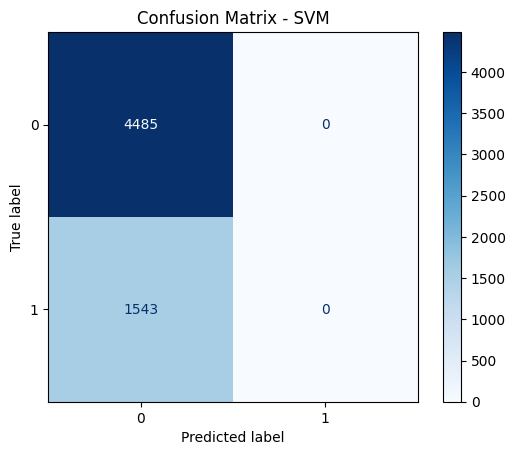

In [55]:
le_income = LabelEncoder()
le_income.fit(df['income'])

# Now use it for labeling
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_income.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()

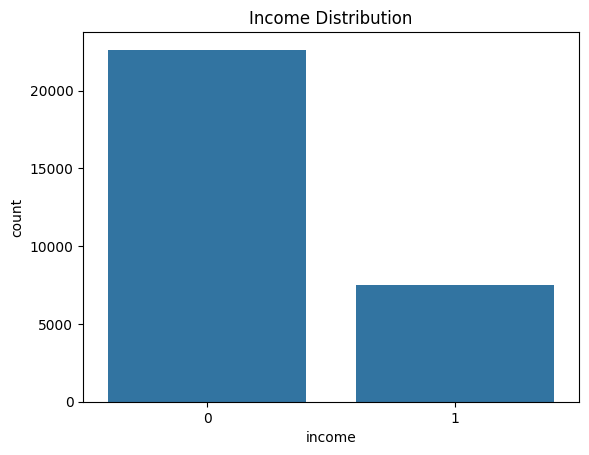

In [56]:
sns.countplot(data=df, x='income')
plt.title("Income Distribution")
plt.show()


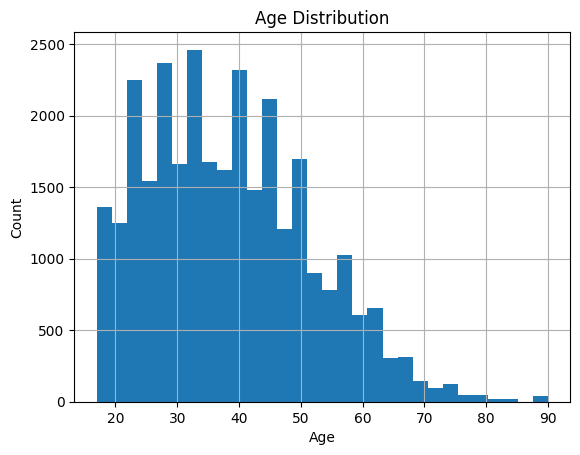

In [57]:
df['age'].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
